In [2]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import warnings
warnings.simplefilter(action='ignore')

## Lecture 12 ##

# Joins

In [4]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [5]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


<br><br><br>

**Exercise:** Join drinks and discounts based on Cafe/Location.

In [6]:
combined=drinks.join('Cafe', discounts,'Location')

<br><br><br>

**Exercise:** Calculate the lowest rate you can get for each drink using the available coupons.

In [7]:
discount_frac = 1-combined.column("Coupon % off")/100.0

(
    combined
    .with_column("Discounted Price", combined.column("Price") * discount_frac)
    .select("Drink", "Discounted Price")
    .group("Drink", min)
)

Drink,Discounted Price min
Espresso,1.3125
Latte,2.4375
Milk Tea,4.95


<br><br><br>
**Exercise:** What happens if I run the following? How many rows will it produce? Why?


In [8]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


## Join for Value Annotation

In [9]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [10]:
carbs = Table().with_columns(
    'Drink', make_array('Milk Tea', 'Latte',  'Espresso'),
    'Carbs', make_array('High',     'Medium', 'Low'))
drinks.join('Drink', carbs)

Drink,Cafe,Price,Carbs
Espresso,Strada,1.75,Low
Espresso,FSM,2,Low
Latte,Strada,3.25,Medium
Milk Tea,Asha,5.5,High


## Bike Sharing ##

In [11]:
trip = Table.read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [13]:
a=trip.column(3)
items=np.unique(a, return_counts=True)
# for k,v in zip(items[0],items[1]):
#     print(k,v)

<br><br><br>
**Exercise:** Create pivot table for Start Station and End Station. What value is being shown in each cell?

In [14]:
#Recap of pivot

trip.pivot(columns='Start Station',
           rows='End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,87,194,558,108,0,0,41,22,0,0,47,78,55,0,10,78,33,47,17,0,0,11,33,422,55,0,0,170,115,304,33,0,0,0,0,0,0,62,123,88,0,0,0,0,0,0,0,0,0,696,445,22,0,0,0,0,0,0,0,0,40,57,0,0,41,241,345,0,17,32
2nd at South Park,299,194,74,183,0,0,210,85,0,0,114,90,164,0,37,60,178,88,116,0,0,58,75,582,503,0,0,140,202,1636,119,0,0,0,0,0,0,300,89,115,0,0,0,0,0,0,0,0,0,562,486,49,0,0,0,0,0,0,0,0,66,153,0,0,377,430,144,0,63,212
2nd at Townsend,446,159,280,92,0,0,612,356,0,0,80,333,173,0,391,371,667,540,272,0,0,27,322,2640,300,0,0,113,241,850,179,0,0,0,0,0,0,123,121,141,0,0,0,0,0,0,0,0,0,923,305,18,0,0,0,0,0,0,0,0,75,513,0,0,2356,788,428,0,61,167
5th at Howard,116,184,153,197,0,0,62,135,0,0,210,77,131,0,33,58,49,178,56,0,0,87,78,380,480,0,0,311,165,169,94,0,0,0,0,0,0,94,198,173,0,0,0,0,0,0,0,0,0,691,1865,50,0,0,0,0,0,0,0,0,118,102,0,0,185,751,202,0,45,270
Adobe on Almaden,0,0,0,0,29,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,8,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,11,7,16,0,0,0,0,0,19,25,268,0,20,6,5,12,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,9,104,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,17,6,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,26,3,8,0,0,0,0,0,6,21,9,0,56,12,43,265,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,187,64,0,0,114,663,0,0,201,80,101,0,247,178,39,598,168,0,0,54,439,74,72,0,0,286,237,169,32,0,0,0,0,0,0,56,227,182,0,0,0,0,0,0,0,0,0,642,271,25,0,0,0,0,0,0,0,0,247,133,0,0,19,173,35,0,65,46
Broadway St at Battery St,69,92,282,122,0,0,1026,156,0,0,66,286,231,0,193,201,81,245,37,0,0,7,77,181,49,0,0,35,114,347,219,0,0,0,0,0,0,172,73,220,0,0,0,0,0,0,0,0,0,698,442,11,0,0,0,0,0,0,0,0,19,106,0,0,353,752,51,0,96,50
California Ave Caltrain Station,0,0,0,0,0,0,0,0,85,1,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,215,43,0,0,0,0,1,0,0,7,0,0,0,20,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,70,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,940,46,0,2,0,0,0,0,0,0,0,11,0,0,0,4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
trip.where('Start Station', are.equal_to('2nd at Folsom')).where('End Station', are.equal_to('2nd at Folsom')).num_rows

87

<br><br><br>
**Exercise:** Create pivot table showing average duration of the trips between the  Start Station and End Station ?

In [17]:
trip.pivot(columns='Start Station',
           rows='End Station',
          values='Duration', 
          collect=np.mean)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,3126.6,393.552,334.699,445.546,0,0,595.537,839.636,0,0,790.064,516.897,588.491,0,1761.4,433.744,533.061,2260.81,9999.29,0,0,825,1612.61,2456.6,568.745,0,0,747.494,460.217,317.875,378.576,0,0,0,0,0,0,1635.44,567.789,518.011,0,0,0,0,0,0,0,0,0,473.157,484.382,1094.05,0,0,0,0,0,0,0,0,432645,365.579,0,0,1061.83,455.913,693.786,0,617,482.438
2nd at South Park,235.729,1671.71,316.23,542.295,0,0,529.043,715.247,0,0,926.43,680.189,670.073,0,640.081,567.283,404.27,1134.38,648.948,0,0,754.362,993.987,873.881,240.62,0,0,841.8,575.401,332.44,423.605,0,0,0,0,0,0,347.313,804.831,626.8,0,0,0,0,0,0,0,0,0,302.737,448.294,883.857,0,0,0,0,0,0,0,0,831.879,380.366,0,0,564.244,367.077,485.868,0,722.063,440.769
2nd at Townsend,434.341,583.755,2636.55,655.196,0,0,689.255,780.067,0,0,846.888,846.514,850.543,0,775.514,483.728,597.793,1239.13,1870.3,0,0,1070.59,981.578,645.451,520.583,0,0,4071.93,1134.56,523.379,873.341,0,0,0,0,0,0,1432.18,2074.36,776.333,0,0,0,0,0,0,0,0,0,424.364,436.993,1882.94,0,0,0,0,0,0,0,0,1148.03,422.858,0,0,551.893,543.003,569.572,0,1228.74,595.311
5th at Howard,501.259,999.304,1660.5,6787.49,0,0,973.79,883.681,0,0,455.276,692.623,718.435,0,1161.85,747.672,613.49,1262.89,2632.8,0,0,520.207,834.692,767.9,391.229,0,0,702.511,662.145,467.976,671.872,0,0,0,0,0,0,525.989,829.788,422.584,0,0,0,0,0,0,0,0,0,456.753,395.332,703.86,0,0,0,0,0,0,0,0,621.237,584.98,0,0,800.065,411.037,569.475,0,1031.8,808.459
Adobe on Almaden,0,0,0,0,3778.86,3475.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,942.176,2026.25,0,0,0,0,0,0,0,0,0,825,0,0,0,0,0,0,0,2441.27,858.571,534.438,0,0,0,0,0,546.316,3098.36,838.078,0,360.4,2353.5,1164.4,681.667,0,0,516.857,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,1506.11,4824.14,0,0,0,0,0,0,0,0,0,0,0,0,0,27409,0,0,0,0,0,1037.53,1692.33,0,0,0,0,0,0,0,0,0,1013.91,0,0,0,0,0,0,0,836.731,902.333,1119.12,0,0,0,0,0,536.667,845.476,1109.33,0,373.393,1127.92,1307.16,283.294,0,0,645,0,0,0,0,0,0,0
Beale at Market,360.701,603.873,788.027,916.781,0,0,6228.8,534.03,0,0,627.423,637.938,303.168,0,232.777,441.483,379.897,610.12,450.494,0,0,697.074,480.713,2682.78,329.5,0,0,731.175,409.882,564.178,1748.41,0,0,0,0,0,0,1996.71,502.335,547.462,0,0,0,0,0,0,0,0,0,788.271,810.31,809.92,0,0,0,0,0,0,0,0,923.344,377.338,0,0,1351.05,466.977,953.429,0,753.415,552.587
Broadway St at Battery St,697.913,865.663,744.826,

In [18]:
# Group vs Pivot

(
    trip
    .select('Start Station','End Station','Subscriber Type','Duration')
    .group(['Start Station','End Station','Subscriber Type'],np.mean)
)

Start Station,End Station,Subscriber Type,Duration mean
2nd at Folsom,2nd at Folsom,Customer,4797.67
2nd at Folsom,2nd at Folsom,Subscriber,1336.17
2nd at Folsom,2nd at South Park,Customer,563.917
2nd at Folsom,2nd at South Park,Subscriber,222.007
2nd at Folsom,2nd at Townsend,Customer,2027.72
2nd at Folsom,2nd at Townsend,Subscriber,311.181
2nd at Folsom,5th at Howard,Customer,1166.73
2nd at Folsom,5th at Howard,Subscriber,431.543
2nd at Folsom,Beale at Market,Customer,473.5
2nd at Folsom,Beale at Market,Subscriber,355.107


## Distribution of Durations ##

In [ ]:
trip.hist('Duration')

In [19]:
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


<br><br><br>
**Exercise:** Create histogram with bins ranging from 0 to 1800 in increments of 250

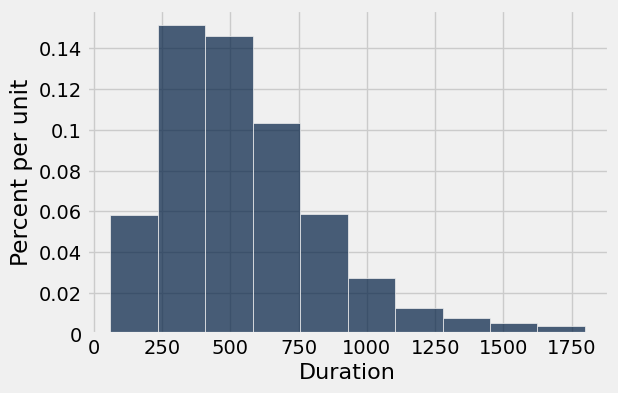

In [20]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

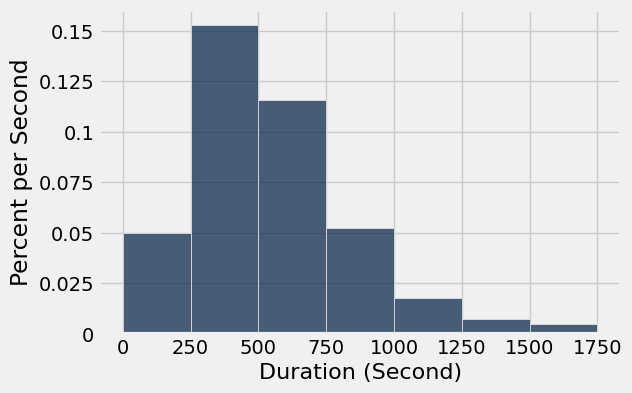

In [21]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

In [22]:
# Approx percent of people who have 
# a ride duration between 250 and 500 seconds
# "between" = [250, 500) 
0.15 * 250

37.5

In [23]:
# Exact answer: 

commute.where('Duration', are.between(250, 500)).num_rows / commute.num_rows

0.38150338561755376

In [24]:
commute.num_rows

338343

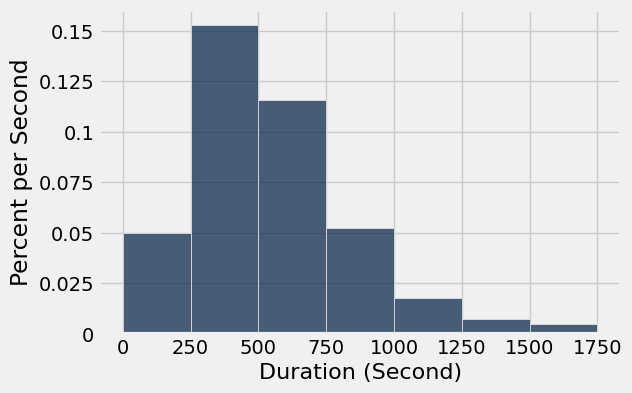

In [25]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

# <br><br><br>
**Exercise:** Create histogram with more fine grained bins

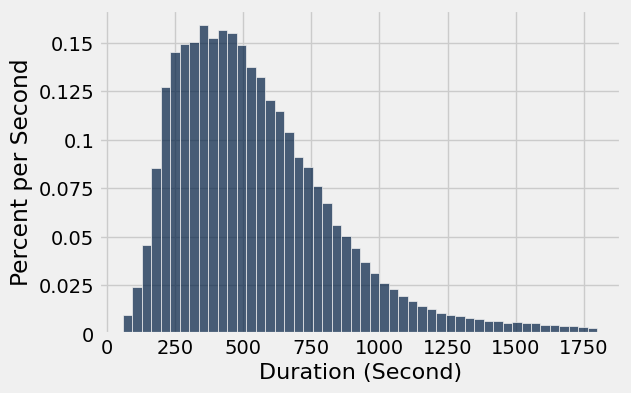

In [26]:
commute.hist('Duration', bins=50, unit='Second')

## Start and End Stations ##

In [27]:
# Most common start station

starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [28]:
# Numbers of trips between stations

commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Average durations of trips between stations

commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,702.13,253.874,309.087,418.065,0,0,424.15,740.714,0,0,668.886,516.897,495.519,0,862.889,388.117,493.469,1114.71,818.429,0,0,825,662.933,500.44,254.245,0,0,728.627,435.947,291.076,378.576,0,0,0,0,0,0,380.083,541.926,518.011,0,0,0,0,0,0,0,0,0,469.137,484.382,1037,0,0,0,0,0,0,0,0,836.684,365.579,0,0,575.923,250.553,646.038,0,617,386.032
2nd at South Park,196.085,618.116,237.366,507.394,0,0,450.279,715.247,0,0,900.679,589.368,612.456,0,640.081,317.625,404.27,940.253,648.948,0,0,732.632,815.671,501.608,230.486,0,0,834.396,513.307,323.982,423.605,0,0,0,0,0,0,328.813,616.429,567.77,0,0,0,0,0,0,0,0,0,281.635,349.079,780.958,0,0,0,0,0,0,0,0,831.879,359.105,0,0,490.479,356.287,473.056,0,722.063,395.474
2nd at Townsend,293.874,281.344,787.314,655.196,0,0,531.243,759.451,0,0,846.888,773.72,803.345,0,691.054,363.294,465.685,926.796,819.772,0,0,1070.59,919.073,609.987,371.105,0,0,877.591,731.92,506.895,673.452,0,0,0,0,0,0,666.625,865.7,776.333,0,0,0,0,0,0,0,0,0,262.334,310.047,985.214,0,0,0,0,0,0,0,0,1102.06,404.522,0,0,543.83,420.519,480.285,0,1092.67,585.169
5th at Howard,381.274,573.729,613.514,718.096,0,0,611.797,808.077,0,0,379.35,668.697,542.512,0,730.4,666.965,613.49,1056.59,952.167,0,0,469.741,834.692,676.55,281.975,0,0,449.548,295.297,414.857,545.6,0,0,0,0,0,0,410.043,255.956,357.799,0,0,0,0,0,0,0,0,0,434.022,386.263,605.708,0,0,0,0,0,0,0,0,553.362,584.98,0,0,662.308,406.225,546.84,0,972.07,206.704
Adobe on Almaden,0,0,0,0,462,583.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,942.176,616,0,0,0,0,0,0,0,0,0,463.92,0,0,0,0,0,0,0,639.857,858.571,534.438,0,0,0,0,0,546.316,399.435,292.702,0,360.4,684,1164.4,251.9,0,0,516.857,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,540.286,948.844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955.312,952.6,0,0,0,0,0,0,0,0,0,706.762,0,0,0,0,0,0,0,684.917,902.333,965,0,0,0,0,0,536.667,782.1,778,0,373.393,1127.92,1222.24,219.985,0,0,645,0,0,0,0,0,0,0
Beale at Market,360.701,603.873,685.934,625,0,0,720.932,282.033,0,0,627.423,273.973,303.168,0,232.777,441.483,300.5,498.2,352.467,0,0,697.074,416.986,465.877,329.5,0,0,731.175,386.292,217.528,350.115,0,0,0,0,0,0,340.857,502.335,374.793,0,0,0,0,0,0,0,0,0,783.228,792.387,809.92,0,0,0,0,0,0,0,0,781.634,301.297,0,0,438.75,207.94,953.429,0,465.688,444.689
Broadway St at Battery St,613.672,826.899,719.695,931.891,0,0,331.727,688.682,0,0,94

## Fastest Trips between Stations ##

How can we find the fastest trip ever between each pair of stations?

In [30]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [31]:
# How would we calculate the best case scenario time between stations?

shortest = duration.group(['Start Station', 'End Station'], min)
shortest.show(5)

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219


## Discussion question

Find the 5 stations closest to Civic Center BART by minimum trip time.

In [32]:
from_cc = shortest.where(
    'Start Station', are.containing('Civic Center BART')).sort(
    'Duration min')
from_cc.take(np.arange(5))

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151


In [33]:
to_cc = shortest.where(
    'End Station', are.containing('Civic Center BART')).sort(
    'Duration min')
to_cc.take(np.arange(5))

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Market at 10th,Civic Center BART (7th at Market),98
Powell Street BART,Civic Center BART (7th at Market),102
Golden Gate at Polk,Civic Center BART (7th at Market),104
San Francisco City Hall,Civic Center BART (7th at Market),146


In [34]:
print(from_cc.num_rows,to_cc.num_rows)

35 35


## Maps ##

In [35]:
# Geographical data on the stations
stations = Table.read_table('station.csv').drop(4, 6)
stations

station_id,name,lat,long,landmark
2,San Jose Diridon Caltrain Station,37.3297,-121.902,San Jose
3,San Jose Civic Center,37.3307,-121.889,San Jose
4,Santa Clara at Almaden,37.334,-121.895,San Jose
5,Adobe on Almaden,37.3314,-121.893,San Jose
6,San Pedro Square,37.3367,-121.894,San Jose
7,Paseo de San Antonio,37.3338,-121.887,San Jose
8,San Salvador at 1st,37.3302,-121.886,San Jose
9,Japantown,37.3487,-121.895,San Jose
10,San Jose City Hall,37.3374,-121.887,San Jose
11,MLK Library,37.3359,-121.886,San Jose


In [36]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations
 .select('lat', 'long', 'name')
 .relabeled('name', 'labels'))
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [37]:
Marker.map_table(sf_stations_map_data)

In [38]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

In [39]:
from_cc.show(3)

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104


In [40]:
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [41]:
close_cc = from_cc.where('Duration min', are.below(4 * 60))
close_markers = (sf_stations_map_data
      .join('labels', close_cc, 'End Station')
      .select('lat', 'long', 'labels'))
Marker.map_table(close_markers)

## Add Colors!

Choose marker colors by the minimum time from Civic Center

In [42]:
minutes = np.round(from_cc.column("Duration min") / 60)
print(min(minutes), max(minutes))

1.0 14.0


In [43]:
colors = Table().with_columns(
    "minutes", np.arange(15),
    "colors",  ["orange", "orange", 
                "lightgreen", "green", "darkgreen", 
                "lightgray", "lightgray", "lightgray", 
                "gray", "gray", "gray", "darkgray",
                "black", "black", "black"])

colors_cc = (from_cc
 .with_column("Minutes", minutes)
 .join("Minutes", colors, "minutes"))

colored_markers = (sf_stations_map_data
      .join('labels', colors_cc, 'End Station')
      .select('lat', 'long', 'labels', 'colors'))
Marker.map_table(colored_markers)

## Example Midterm Questions

For each of the following, write a Python expression that returns the given data:

1. The name of the station where most rentals ended

2. The number of stations for which the average duration of trips ending at that station was more than 10 minutes

3. The number of stations that have more than 500 starts and more than 500 ends.